In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import scipy
from matplotlib import pyplot as plt
from matplotlib import cm
import os
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error

In [2]:
#Set step, paths, pfts and run all

STEP = 4

STEP1_results = '/data/workflows/US-Prr-STEP1-SA/results.csv'
STEP1_sample_matrix = '/data/workflows/US-Prr-STEP1-SA/sample_matrix.csv'

STEP2_results = '/data/workflows/US-Prr-STEP2-SA/results.csv'
STEP2_sample_matrix = '/data/workflows/US-Prr-STEP2-SA/sample_matrix.csv'

STEP3_results = '/data/workflows/US-Prr-STEP3-SA/results.csv'
STEP3_sample_matrix = '/data/workflows/US-Prr-STEP3-SA/sample_matrix.csv'

#STEP3_results = 'results_US-Prr_STEP3.csv'
#STEP3_sample_matrix = 'sample_matrix_US-Prr_STEP3.csv'

STEP4_results = '/data/workflows/US-Prr-STEP4-SA-lower/results.csv'
STEP4_sample_matrix = '/data/workflows/US-Prr-STEP4-SA-lower/sample_matrix.csv'

#STEP4_results = '/data/workflows/US-Prr-STEP4-SA/results.csv'
#STEP4_sample_matrix = '/data/workflows/US-Prr-STEP4-SA/sample_matrix.csv'

pfts=['Black Spruce', 'Moss (Sphagnum dominant)', 'Shrubs (Deciduous Dominant)', 'Tussock Cottongrass', 'Reindeer Lichen']

In [3]:
if STEP == 3:
    target_vars = [
                   'VegCarbonLeaf1', 'VegCarbonStem1', 'VegCarbonRoot1', 'VegCarbonLeaf2', 'VegCarbonLeaf3',
                   'VegCarbonStem3', 'VegCarbonRoot3', 'VegCarbonLeaf4',
                   'VegCarbonRoot4', 'VegCarbonLeaf5',
                   'VegNitrogenLeaf1', 'VegNitrogenStem1', 'VegNitrogenRoot1', 'VegNitrogenLeaf2', 'VegNitrogenLeaf3',
                   'VegNitrogenStem3', 'VegNitrogenRoot3', 'VegNitrogenLeaf4',
                   'VegNitrogenRoot4', 'VegNitrogenLeaf5']
    
    calib_params = [
                    ['cfall(0)','cfall(0).1','cfall(0).2','cfall(0).3','cfall(0).4'],
                    ['cfall(1)','cfall(1).1'],
                    ['cfall(2)','cfall(2).1','cfall(2).2'],
                    ['nfall(0)','nfall(0).1','nfall(0).2','nfall(0).3','nfall(0).4'],
                    ['nfall(1)','nfall(1).1'],
                    ['nfall(2)','nfall(2).1','nfall(2).2']]
    calib_params_flat=[
                    'cfall(0)','cfall(0).1','cfall(0).2','cfall(0).3','cfall(0).4',
                    'cfall(1)','cfall(1).1',
                    'cfall(2)','cfall(2).1','cfall(2).2',
                    'nfall(0)','nfall(0).1','nfall(0).2','nfall(0).3','nfall(0).4',
                    'nfall(1)','nfall(1).1',
                    'nfall(2)','nfall(2).1','nfall(2).2']

In [4]:
#if number of pfts != 5 you will have to adjust these values

if STEP == 1:
    target_vars = ['GPP1', 'GPP2', 'GPP3', 'GPP4', 'GPP5']
    
    calib_params = [['cmax', 'cmax.1', 'cmax.2', 'cmax.3', 'cmax.4']] # here for reference
    
    vars_nopft= ['GPP']

if STEP == 2:
    target_vars = ['NPPAll1', 'NPPAll2', 'NPPAll3', 'NPPAll4', 'NPPAll5',
                   'VegCarbonLeaf1', 'VegCarbonStem1', 'VegCarbonRoot1', 'VegCarbonLeaf2', 'VegCarbonLeaf3',
                   'VegCarbonStem3', 'VegCarbonRoot3', 'VegCarbonLeaf4',
                   'VegCarbonRoot4', 'VegCarbonLeaf5']
    
    calib_params = [['nmax', 'nmax.1', 'nmax.2', 'nmax.3', 'nmax.4'], # here for reference
                    ['krb(0)','krb(0).1','krb(0).2','krb(0).3','krb(0).4'],
                    ['krb(1)','krb(1).1'],
                    ['krb(2)','krb(2).1','krb(2).2']]
    
    vars_nopft  = ['NPPAll', 'VegCarbonLeaf', 'VegCarbonStem', 'VegCarbonRoot']
    
if STEP == 3:
    target_vars = ['NPPAll1', 'NPPAll2', 'NPPAll3', 'NPPAll4', 'NPPAll5',
                   'VegCarbonLeaf1', 'VegCarbonStem1', 'VegCarbonRoot1', 'VegCarbonLeaf2', 'VegCarbonLeaf3',
                   'VegCarbonStem3', 'VegCarbonRoot3', 'VegCarbonLeaf4',
                   'VegCarbonRoot4', 'VegCarbonLeaf5',
                   'VegNitrogenLeaf1', 'VegNitrogenStem1', 'VegNitrogenRoot1', 'VegNitrogenLeaf2', 'VegNitrogenLeaf3',
                   'VegNitrogenStem3', 'VegNitrogenRoot3', 'VegNitrogenLeaf4',
                   'VegNitrogenRoot4', 'VegNitrogenLeaf5']
    
    calib_params = [['nmax', 'nmax.1', 'nmax.2', 'nmax.3', 'nmax.4'], # here for reference
                    ['krb(0)','krb(0).1','krb(0).2','krb(0).3','krb(0).4'],
                    ['krb(1)','krb(1).1'],
                    ['krb(2)','krb(2).1','krb(2).2'],
                    ['cfall(0)','cfall(0).1','cfall(0).2','cfall(0).3','cfall(0).4'],
                    ['cfall(1)','cfall(1).1'],
                    ['cfall(2)','cfall(2).1','cfall(2).2'],
                    ['nfall(0)','nfall(0).1','nfall(0).2','nfall(0).3','nfall(0).4'],
                    ['nfall(1)','nfall(1).1'],
                    ['nfall(2)','nfall(2).1','nfall(2).2']]
    calib_params_flat=['nmax', 'nmax.1', 'nmax.2', 'nmax.3', 'nmax.4', # here for reference
                    'krb(0)','krb(0).1','krb(0).2','krb(0).3','krb(0).4',
                    'krb(1)','krb(1).1',
                    'krb(2)','krb(2).1','krb(2).2',
                    'cfall(0)','cfall(0).1','cfall(0).2','cfall(0).3','cfall(0).4',
                    'cfall(1)','cfall(1).1',
                    'cfall(2)','cfall(2).1','cfall(2).2',
                    'nfall(0)','nfall(0).1','nfall(0).2','nfall(0).3','nfall(0).4',
                    'nfall(1)','nfall(1).1',
                    'nfall(2)','nfall(2).1','nfall(2).2']
    
    vars_nopft  = ['NPPAll', 'VegCarbonLeaf', 'VegCarbonStem', 'VegCarbonRoot', 'VegNitrogenLeaf', 'VegNitrogenStem', 'VegNitrogenRoot']
    
if STEP == 4:
    target_vars = ['CarbonShallow', 'CarbonDeep', 'CarbonMineralSum', 'OrganicNitrogenSum', 'AvailableNitrogenSum']
    
    calib_params = [['micbnup', 'kdcrawc', 'kdcsoma', 'kdcsompr', 'kdcsomcr']] # here for reference
    calib_params_flat = ['micbnup', 'kdcrawc', 'kdcsoma', 'kdcsompr', 'kdcsomcr']
    vars_nopft= ['CarbonShallow', 'CarbonDeep', 'CarbonMineralSum', 'OrganicNitrogenSum', 'AvailableNitrogenSum']


In [5]:
def Filter(string_list, substr):
    """ filters list of strings for items containing substring """
    return [str for str in string_list if
             any(sub in str for sub in substr)]

In [6]:
def calc_rmse(x,y):
    """ Return rmse where x and y are array-like """
    return ((x-y) ** 2).mean() ** .5

In [7]:
def calc_overall_accuracy(results, sample_matrix, target_vars, vars_nopft):
    
    results = pd.read_csv(results, names=target_vars)
    print(results)
    # extract targets from last row of results csv
    targets = results.loc[len(results)-1] 
    results = results.loc[0:len(results)-2]
    
    r2s = []
    rmses=[]
    
    #calculate r2s and rmse for individual variables 
    for index, row in results.iterrows():
        
        tgt_r2s = []
        tgt_rmses = []
        
        for var_nopft in vars_nopft:
            
            results_vars_cols = Filter(results, [var_nopft])
            if row[results_vars_cols].isna().values.any():
                tgt_r2s.append(0)
                tgt_rmses.append(10000000)
                continue
            tgt_r2s.append(r2_score(row[results_vars_cols], targets[results_vars_cols]))
            tgt_rmses.append(calc_rmse(row[results_vars_cols], targets[results_vars_cols]))  
            
        r2s.append(tgt_r2s)
        rmses.append(tgt_rmses)

    # concatenate sample matrix to results
    sample_matrix = pd.read_csv(sample_matrix)
    results[sample_matrix.columns] = sample_matrix
    r2s=np.array(r2s)
    rmses=np.array(rmses)
    
    #iterate over target variables (no pft or compartment)
    for idx, name in enumerate(vars_nopft):
        
        #set r2 and rmse columns
        results[name + '_r2_raw'] = r2s[:, idx]
        results[name + '_rmse_raw'] = rmses[:, idx]
        
        #scale rmse between min and max
        results[name + '_rmse_scaled'] = (results[name + '_rmse_raw']-np.nanmin(results[name + '_rmse_raw']))/(np.max(results[name + '_rmse_raw'])-np.nanmin(results[name + '_rmse_raw']))
        
        #subrtact scaled rmse from r2 for overall accuracy term
        results[name + '_accuracy'] = (results[name + '_r2_raw']-results[name+'_rmse_scaled'])
    
    #scale r2 and rmse and combine for overall accuracy term
    results['overall_accuracy'] = results[Filter(list(results.columns), ['accuracy'])].mean(axis=1)
    results['mean_rmse'] = results[Filter(list(results.columns), ['_rmse_scaled'])].mean(axis=1)
    results['mean_r2'] = results[Filter(list(results.columns), ['_r2_raw'])].mean(axis=1)
    
    return results, targets

In [8]:
if STEP == 1:
    results, targets = calc_overall_accuracy(STEP1_results, STEP1_sample_matrix, target_vars, vars_nopft)
if STEP == 2:
    results, targets = calc_overall_accuracy(STEP2_results, STEP2_sample_matrix, target_vars, vars_nopft)
    
if STEP == 3:
    results, targets = calc_overall_accuracy(STEP3_results, STEP3_sample_matrix, target_vars, vars_nopft)

if STEP == 4:
    results, targets = calc_overall_accuracy(STEP4_results, STEP4_sample_matrix, target_vars, vars_nopft)

print('{} runs'.format(len(results)))


     CarbonShallow    CarbonDeep  CarbonMineralSum  OrganicNitrogenSum  \
0      2367.190903  12354.266544      53518.806229         2821.763719   
1      2334.407350  12690.846759      60477.192779         2609.110295   
2      2317.624440  12875.791513      64479.390032         2677.755603   
3      7796.437778  30129.454000      50993.732887         2791.576483   
4      2698.312145  12794.436009      59312.164866         2603.061804   
..             ...           ...               ...                 ...   
496    2445.248077  12554.062896      55457.663813         2681.437023   
497    2334.994673  12615.756515      58654.942019         2683.956223   
498    2390.453877  12403.014110      53804.834480         2786.715610   
499    2730.080582  12718.759110      59366.163206         2620.243833   
500    4362.190000  22396.020000      45220.400000         2748.367000   

     AvailableNitrogenSum  
0                0.152334  
1                0.298882  
2                0.651506  

/home/develop/.pyenv/versions/3.8.6/lib/python3.8/site-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/home/develop/.pyenv/versions/3.8.6/lib/python3.8/site-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/home/develop/.pyenv/versions/3.8.6/lib/python3.8/site-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/home/develop/.pyenv/versions/3.8.6/lib/python3.8/site-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/home/develop/.pyenv/versions/3.8.6/lib/python3.8/site-packages/sklearn/metrics/_regression.

/home/develop/.pyenv/versions/3.8.6/lib/python3.8/site-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/home/develop/.pyenv/versions/3.8.6/lib/python3.8/site-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/home/develop/.pyenv/versions/3.8.6/lib/python3.8/site-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/home/develop/.pyenv/versions/3.8.6/lib/python3.8/site-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/home/develop/.pyenv/versions/3.8.6/lib/python3.8/site-packages/sklearn/metrics/_regression.

/home/develop/.pyenv/versions/3.8.6/lib/python3.8/site-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/home/develop/.pyenv/versions/3.8.6/lib/python3.8/site-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/home/develop/.pyenv/versions/3.8.6/lib/python3.8/site-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/home/develop/.pyenv/versions/3.8.6/lib/python3.8/site-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/home/develop/.pyenv/versions/3.8.6/lib/python3.8/site-packages/sklearn/metrics/_regression.

/home/develop/.pyenv/versions/3.8.6/lib/python3.8/site-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/home/develop/.pyenv/versions/3.8.6/lib/python3.8/site-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/home/develop/.pyenv/versions/3.8.6/lib/python3.8/site-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/home/develop/.pyenv/versions/3.8.6/lib/python3.8/site-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/home/develop/.pyenv/versions/3.8.6/lib/python3.8/site-packages/sklearn/metrics/_regression.

/home/develop/.pyenv/versions/3.8.6/lib/python3.8/site-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/home/develop/.pyenv/versions/3.8.6/lib/python3.8/site-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/home/develop/.pyenv/versions/3.8.6/lib/python3.8/site-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/home/develop/.pyenv/versions/3.8.6/lib/python3.8/site-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/home/develop/.pyenv/versions/3.8.6/lib/python3.8/site-packages/sklearn/metrics/_regression.

/home/develop/.pyenv/versions/3.8.6/lib/python3.8/site-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/home/develop/.pyenv/versions/3.8.6/lib/python3.8/site-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/home/develop/.pyenv/versions/3.8.6/lib/python3.8/site-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/home/develop/.pyenv/versions/3.8.6/lib/python3.8/site-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/home/develop/.pyenv/versions/3.8.6/lib/python3.8/site-packages/sklearn/metrics/_regression.

/home/develop/.pyenv/versions/3.8.6/lib/python3.8/site-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/home/develop/.pyenv/versions/3.8.6/lib/python3.8/site-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/home/develop/.pyenv/versions/3.8.6/lib/python3.8/site-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/home/develop/.pyenv/versions/3.8.6/lib/python3.8/site-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/home/develop/.pyenv/versions/3.8.6/lib/python3.8/site-packages/sklearn/metrics/_regression.

/home/develop/.pyenv/versions/3.8.6/lib/python3.8/site-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/home/develop/.pyenv/versions/3.8.6/lib/python3.8/site-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/home/develop/.pyenv/versions/3.8.6/lib/python3.8/site-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/home/develop/.pyenv/versions/3.8.6/lib/python3.8/site-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/home/develop/.pyenv/versions/3.8.6/lib/python3.8/site-packages/sklearn/metrics/_regression.

/home/develop/.pyenv/versions/3.8.6/lib/python3.8/site-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/home/develop/.pyenv/versions/3.8.6/lib/python3.8/site-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/home/develop/.pyenv/versions/3.8.6/lib/python3.8/site-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/home/develop/.pyenv/versions/3.8.6/lib/python3.8/site-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/home/develop/.pyenv/versions/3.8.6/lib/python3.8/site-packages/sklearn/metrics/_regression.

/home/develop/.pyenv/versions/3.8.6/lib/python3.8/site-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/home/develop/.pyenv/versions/3.8.6/lib/python3.8/site-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/home/develop/.pyenv/versions/3.8.6/lib/python3.8/site-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/home/develop/.pyenv/versions/3.8.6/lib/python3.8/site-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/home/develop/.pyenv/versions/3.8.6/lib/python3.8/site-packages/sklearn/metrics/_regression.

/home/develop/.pyenv/versions/3.8.6/lib/python3.8/site-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/home/develop/.pyenv/versions/3.8.6/lib/python3.8/site-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/home/develop/.pyenv/versions/3.8.6/lib/python3.8/site-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/home/develop/.pyenv/versions/3.8.6/lib/python3.8/site-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/home/develop/.pyenv/versions/3.8.6/lib/python3.8/site-packages/sklearn/metrics/_regression.

/home/develop/.pyenv/versions/3.8.6/lib/python3.8/site-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/home/develop/.pyenv/versions/3.8.6/lib/python3.8/site-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/home/develop/.pyenv/versions/3.8.6/lib/python3.8/site-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/home/develop/.pyenv/versions/3.8.6/lib/python3.8/site-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/home/develop/.pyenv/versions/3.8.6/lib/python3.8/site-packages/sklearn/metrics/_regression.

/home/develop/.pyenv/versions/3.8.6/lib/python3.8/site-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/home/develop/.pyenv/versions/3.8.6/lib/python3.8/site-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/home/develop/.pyenv/versions/3.8.6/lib/python3.8/site-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/home/develop/.pyenv/versions/3.8.6/lib/python3.8/site-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/home/develop/.pyenv/versions/3.8.6/lib/python3.8/site-packages/sklearn/metrics/_regression.

/home/develop/.pyenv/versions/3.8.6/lib/python3.8/site-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/home/develop/.pyenv/versions/3.8.6/lib/python3.8/site-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/home/develop/.pyenv/versions/3.8.6/lib/python3.8/site-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/home/develop/.pyenv/versions/3.8.6/lib/python3.8/site-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/home/develop/.pyenv/versions/3.8.6/lib/python3.8/site-packages/sklearn/metrics/_regression.

/home/develop/.pyenv/versions/3.8.6/lib/python3.8/site-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/home/develop/.pyenv/versions/3.8.6/lib/python3.8/site-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/home/develop/.pyenv/versions/3.8.6/lib/python3.8/site-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/home/develop/.pyenv/versions/3.8.6/lib/python3.8/site-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/home/develop/.pyenv/versions/3.8.6/lib/python3.8/site-packages/sklearn/metrics/_regression.

/home/develop/.pyenv/versions/3.8.6/lib/python3.8/site-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/home/develop/.pyenv/versions/3.8.6/lib/python3.8/site-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/home/develop/.pyenv/versions/3.8.6/lib/python3.8/site-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/home/develop/.pyenv/versions/3.8.6/lib/python3.8/site-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/home/develop/.pyenv/versions/3.8.6/lib/python3.8/site-packages/sklearn/metrics/_regression.

/home/develop/.pyenv/versions/3.8.6/lib/python3.8/site-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/home/develop/.pyenv/versions/3.8.6/lib/python3.8/site-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/home/develop/.pyenv/versions/3.8.6/lib/python3.8/site-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/home/develop/.pyenv/versions/3.8.6/lib/python3.8/site-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/home/develop/.pyenv/versions/3.8.6/lib/python3.8/site-packages/sklearn/metrics/_regression.

/home/develop/.pyenv/versions/3.8.6/lib/python3.8/site-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/home/develop/.pyenv/versions/3.8.6/lib/python3.8/site-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/home/develop/.pyenv/versions/3.8.6/lib/python3.8/site-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/home/develop/.pyenv/versions/3.8.6/lib/python3.8/site-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/home/develop/.pyenv/versions/3.8.6/lib/python3.8/site-packages/sklearn/metrics/_regression.

/home/develop/.pyenv/versions/3.8.6/lib/python3.8/site-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/home/develop/.pyenv/versions/3.8.6/lib/python3.8/site-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/home/develop/.pyenv/versions/3.8.6/lib/python3.8/site-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/home/develop/.pyenv/versions/3.8.6/lib/python3.8/site-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/home/develop/.pyenv/versions/3.8.6/lib/python3.8/site-packages/sklearn/metrics/_regression.

/home/develop/.pyenv/versions/3.8.6/lib/python3.8/site-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/home/develop/.pyenv/versions/3.8.6/lib/python3.8/site-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/home/develop/.pyenv/versions/3.8.6/lib/python3.8/site-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/home/develop/.pyenv/versions/3.8.6/lib/python3.8/site-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/home/develop/.pyenv/versions/3.8.6/lib/python3.8/site-packages/sklearn/metrics/_regression.

/home/develop/.pyenv/versions/3.8.6/lib/python3.8/site-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/home/develop/.pyenv/versions/3.8.6/lib/python3.8/site-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/home/develop/.pyenv/versions/3.8.6/lib/python3.8/site-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/home/develop/.pyenv/versions/3.8.6/lib/python3.8/site-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/home/develop/.pyenv/versions/3.8.6/lib/python3.8/site-packages/sklearn/metrics/_regression.

/home/develop/.pyenv/versions/3.8.6/lib/python3.8/site-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/home/develop/.pyenv/versions/3.8.6/lib/python3.8/site-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/home/develop/.pyenv/versions/3.8.6/lib/python3.8/site-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/home/develop/.pyenv/versions/3.8.6/lib/python3.8/site-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/home/develop/.pyenv/versions/3.8.6/lib/python3.8/site-packages/sklearn/metrics/_regression.

/home/develop/.pyenv/versions/3.8.6/lib/python3.8/site-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/home/develop/.pyenv/versions/3.8.6/lib/python3.8/site-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/home/develop/.pyenv/versions/3.8.6/lib/python3.8/site-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/home/develop/.pyenv/versions/3.8.6/lib/python3.8/site-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/home/develop/.pyenv/versions/3.8.6/lib/python3.8/site-packages/sklearn/metrics/_regression.

/home/develop/.pyenv/versions/3.8.6/lib/python3.8/site-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/home/develop/.pyenv/versions/3.8.6/lib/python3.8/site-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/home/develop/.pyenv/versions/3.8.6/lib/python3.8/site-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/home/develop/.pyenv/versions/3.8.6/lib/python3.8/site-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/home/develop/.pyenv/versions/3.8.6/lib/python3.8/site-packages/sklearn/metrics/_regression.

/home/develop/.pyenv/versions/3.8.6/lib/python3.8/site-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/home/develop/.pyenv/versions/3.8.6/lib/python3.8/site-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/home/develop/.pyenv/versions/3.8.6/lib/python3.8/site-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/home/develop/.pyenv/versions/3.8.6/lib/python3.8/site-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/home/develop/.pyenv/versions/3.8.6/lib/python3.8/site-packages/sklearn/metrics/_regression.

/home/develop/.pyenv/versions/3.8.6/lib/python3.8/site-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/home/develop/.pyenv/versions/3.8.6/lib/python3.8/site-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/home/develop/.pyenv/versions/3.8.6/lib/python3.8/site-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/home/develop/.pyenv/versions/3.8.6/lib/python3.8/site-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/home/develop/.pyenv/versions/3.8.6/lib/python3.8/site-packages/sklearn/metrics/_regression.

/home/develop/.pyenv/versions/3.8.6/lib/python3.8/site-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/home/develop/.pyenv/versions/3.8.6/lib/python3.8/site-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/home/develop/.pyenv/versions/3.8.6/lib/python3.8/site-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/home/develop/.pyenv/versions/3.8.6/lib/python3.8/site-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/home/develop/.pyenv/versions/3.8.6/lib/python3.8/site-packages/sklearn/metrics/_regression.

/home/develop/.pyenv/versions/3.8.6/lib/python3.8/site-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/home/develop/.pyenv/versions/3.8.6/lib/python3.8/site-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/home/develop/.pyenv/versions/3.8.6/lib/python3.8/site-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/home/develop/.pyenv/versions/3.8.6/lib/python3.8/site-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/home/develop/.pyenv/versions/3.8.6/lib/python3.8/site-packages/sklearn/metrics/_regression.

/home/develop/.pyenv/versions/3.8.6/lib/python3.8/site-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/home/develop/.pyenv/versions/3.8.6/lib/python3.8/site-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/home/develop/.pyenv/versions/3.8.6/lib/python3.8/site-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/home/develop/.pyenv/versions/3.8.6/lib/python3.8/site-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/home/develop/.pyenv/versions/3.8.6/lib/python3.8/site-packages/sklearn/metrics/_regression.

/home/develop/.pyenv/versions/3.8.6/lib/python3.8/site-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/home/develop/.pyenv/versions/3.8.6/lib/python3.8/site-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/home/develop/.pyenv/versions/3.8.6/lib/python3.8/site-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/home/develop/.pyenv/versions/3.8.6/lib/python3.8/site-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/home/develop/.pyenv/versions/3.8.6/lib/python3.8/site-packages/sklearn/metrics/_regression.

/home/develop/.pyenv/versions/3.8.6/lib/python3.8/site-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/home/develop/.pyenv/versions/3.8.6/lib/python3.8/site-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/home/develop/.pyenv/versions/3.8.6/lib/python3.8/site-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/home/develop/.pyenv/versions/3.8.6/lib/python3.8/site-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/home/develop/.pyenv/versions/3.8.6/lib/python3.8/site-packages/sklearn/metrics/_regression.

500 runs


/home/develop/.pyenv/versions/3.8.6/lib/python3.8/site-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/home/develop/.pyenv/versions/3.8.6/lib/python3.8/site-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/home/develop/.pyenv/versions/3.8.6/lib/python3.8/site-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/home/develop/.pyenv/versions/3.8.6/lib/python3.8/site-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/home/develop/.pyenv/versions/3.8.6/lib/python3.8/site-packages/sklearn/metrics/_regression.

In [9]:
results

,CarbonShallow,CarbonDeep,CarbonMineralSum,OrganicNitrogenSum,AvailableNitrogenSum,micbnup,kdcrawc,kdcsoma,kdcsompr,kdcsomcr,...,OrganicNitrogenSum_rmse_raw,OrganicNitrogenSum_rmse_scaled,OrganicNitrogenSum_accuracy,AvailableNitrogenSum_r2_raw,AvailableNitrogenSum_rmse_raw,AvailableNitrogenSum_rmse_scaled,AvailableNitrogenSum_accuracy,overall_accuracy,mean_rmse,mean_r2
0,2367.190903,12354.266544,53518.806229,2821.763719,0.152334,1.656763,0.756906,0.460956,0.239056,2.005545e-08,...,73.396719,0.094042,NaN,NaN,6.001492,0.152800,NaN,NaN,0.141625,NaN
1,2334.407350,12690.846759,60477.192779,2609.110295,0.298882,0.227436,0.845437,0.354124,0.211895,8.931009e-08,...,139.256705,0.179500,NaN,NaN,5.854944,0.148106,NaN,NaN,0.186932,NaN
2,2317.624440,12875.791513,64479.390032,2677.755603,0.651506,0.134291,0.874642,0.361414,0.128098,6.266299e-08,...,70.611397,0.090427,NaN,NaN,5.502320,0.136810,NaN,NaN,0.183673,NaN
3,7796.437778,30129.454000,50993.732887,2791.576483,0.013630,1.853501,0.019023,0.384091,0.172243,7.227347e-08,...,43.209483,0.054871,NaN,NaN,6.140196,0.157243,NaN,NaN,0.112398,NaN
4,2698.312145,12794.436009,59312.164866,2603.061804,0.102904,1.388140,0.133177,0.243019,0.090320,8.044568e-08,...,145.305196,0.187349,NaN,NaN,6.050922,0.154384,NaN,NaN,0.183507,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,5156.181827,45027.680702,50095.624725,3156.078589,1.455060,0.898986,0.122303,0.168754,0.001235,3.936113e-09,...,407.711589,0.527843,NaN,NaN,4.698766,0.111070,NaN,NaN,0.273736,NaN
496,2445.248077,12554.062896,55457.663813,2681.437023,0.132533,1.954795,0.240006,0.532332,0.209936,5.507054e-08,...,66.929977,0.085651,NaN,NaN,6.021293,0.153434,NaN,NaN,0.147488,NaN
497,2334.994673,12615.756515,58654.942019,2683.956223,0.343944,0.314758,0.720862,0.482200,0.183081,7.697696e-08,...,64.410777,0.082382,NaN,NaN,5.809882,0.146662,NaN,NaN,0.159522,NaN
498,2390.453877,12403.014110,53804.834480,2786.715610,0.186455,1.951067,0.567870,0.276605,0.162468,6.853387e-09,...,38.348610,0.048564,NaN,NaN,5.967371,0.151707,NaN,NaN,0.133281,NaN


In [10]:
#get indices of top 15 performing parameter sets
perf = np.argsort(results['overall_accuracy'])[::-1]
perf = np.argsort(results['mean_rmse'])[::-1]
top = perf[:50].values.tolist()
first = perf[:5].values.tolist()

In [11]:
top

[290,
 242,
 327,
 285,
 382,
 367,
 372,
 52,
 331,
 81,
 289,
 311,
 480,
 376,
 391,
 454,
 330,
 54,
 223,
 37,
 153,
 446,
 257,
 302,
 225,
 361,
 265,
 95,
 495,
 154,
 136,
 82,
 207,
 380,
 460,
 220,
 282,
 467,
 271,
 456,
 89,
 143,
 449,
 342,
 447,
 159,
 209,
 258,
 437,
 45]

Text(0.5, 0, 'Mean RMSE across all variables - scaled between min and max')

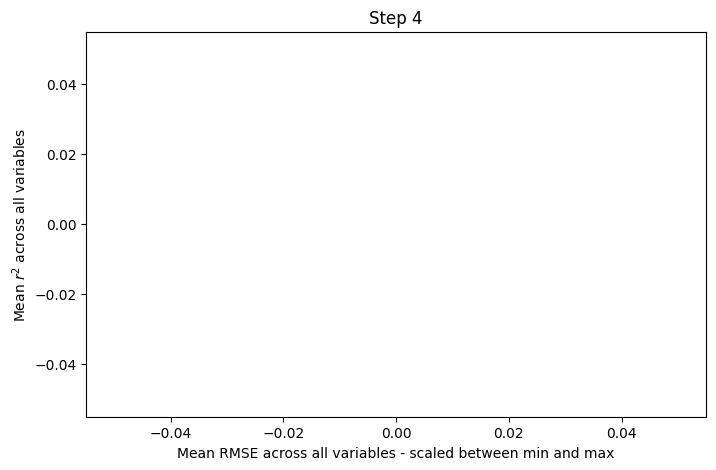

In [12]:
fig, ax = plt.subplots(figsize = (8,5))

sns.scatterplot(data = results, x='mean_rmse', y='mean_r2')
sns.scatterplot(data = results.iloc[top], x='mean_rmse', y='mean_r2', color='red')
sns.scatterplot(data = results.iloc[first], x='mean_rmse', y='mean_r2', color='yellow')

ax.title.set_text('Step {}'.format(STEP))
ax.set_ylabel('Mean $r^2$ across all variables')
ax.set_xlabel('Mean RMSE across all variables - scaled between min and max')

In [13]:
results.columns

Index(['CarbonShallow', 'CarbonDeep', 'CarbonMineralSum', 'OrganicNitrogenSum',
       'AvailableNitrogenSum', 'micbnup', 'kdcrawc', 'kdcsoma', 'kdcsompr',
       'kdcsomcr', 'CarbonShallow_r2_raw', 'CarbonShallow_rmse_raw',
       'CarbonShallow_rmse_scaled', 'CarbonShallow_accuracy',
       'CarbonDeep_r2_raw', 'CarbonDeep_rmse_raw', 'CarbonDeep_rmse_scaled',
       'CarbonDeep_accuracy', 'CarbonMineralSum_r2_raw',
       'CarbonMineralSum_rmse_raw', 'CarbonMineralSum_rmse_scaled',
       'CarbonMineralSum_accuracy', 'OrganicNitrogenSum_r2_raw',
       'OrganicNitrogenSum_rmse_raw', 'OrganicNitrogenSum_rmse_scaled',
       'OrganicNitrogenSum_accuracy', 'AvailableNitrogenSum_r2_raw',
       'AvailableNitrogenSum_rmse_raw', 'AvailableNitrogenSum_rmse_scaled',
       'AvailableNitrogenSum_accuracy', 'overall_accuracy', 'mean_rmse',
       'mean_r2'],
      dtype='object')

In [14]:
palette = sns.color_palette("mako", as_cmap=True)

if STEP == 1:
    fig, axes = plt.subplots(2,3, figsize = (8,5))
    fig.suptitle('STEP 1 cmax vs GPP for each PFT')

    axes[0,0].axhline(targets['GPP1'], color='grey', alpha=0.5)
    sns.scatterplot(data = results, x='cmax', y='GPP1', ax=axes[0,0], legend=False, alpha=0.05)
    sns.scatterplot(data = results.iloc[top], x='cmax', y='GPP1', ax=axes[0,0], color='red', legend=False)
    sns.scatterplot(data = results.iloc[first], x='cmax', y='GPP1', ax=axes[0,0], color='yellow', legend=False)
    axes[0,0].title.set_text(pfts[0])

    axes[0,1].axhline(targets['GPP2'], color='grey', alpha=0.5)
    sns.scatterplot(data = results, x='cmax.1', y='GPP2', ax=axes[0,1], legend=False, alpha=0.05)
    sns.scatterplot(data = results.iloc[top], x='cmax.1', y='GPP2', ax=axes[0,1], color='red', legend=False)
    sns.scatterplot(data = results.iloc[first], x='cmax.1', y='GPP2', ax=axes[0,1], color='yellow', legend=False)
    axes[0,1].title.set_text(pfts[1])

    axes[0,2].axhline(targets['GPP3'], color='grey', alpha=0.5)
    sns.scatterplot(data = results, x='cmax.2', y='GPP3', ax=axes[0,2], legend=False, alpha=0.05)
    sns.scatterplot(data = results.iloc[top], x='cmax.2', y='GPP3', ax=axes[0,2], color='red', legend=False)
    sns.scatterplot(data = results.iloc[first], x='cmax.2', y='GPP3', ax=axes[0,2], color='yellow', legend=False)
    axes[0,2].title.set_text(pfts[2])

    axes[1,0].axhline(targets['GPP4'], color='grey', alpha=0.5)
    sns.scatterplot(data = results, x='cmax.3', y='GPP4', ax=axes[1,0], alpha=0.05, palette=palette)
    sns.scatterplot(data = results.iloc[top], x='cmax.3', y='GPP4', ax=axes[1,0], color='red', legend=False)
    sns.scatterplot(data = results.iloc[first], x='cmax.3', y='GPP4', ax=axes[1,0], color='yellow', legend=False)
    axes[1,0].title.set_text(pfts[3])

    axes[1,1].axhline(targets['GPP5'], color='grey', alpha=0.5)
    sns.scatterplot(data = results, x='cmax.4', y='GPP5', ax=axes[1,1], legend=False, alpha=0.05)
    sns.scatterplot(data = results.iloc[top], x='cmax.4', y='GPP5', ax=axes[1,1], color='red', label='Top 15 runs')
    sns.scatterplot(data = results.iloc[first], x='cmax.4', y='GPP5', ax=axes[1,1], color='yellow', label='Top run')
    axes[1,1].title.set_text(pfts[4])

    #axes[1,1].legend(loc='lower right', bbox_to_anchor=(1,0), title='Overall Accuracy')
   
    fig.tight_layout()


In [15]:
if STEP == 2:
    fig, axes = plt.subplots(2,3, figsize = (10,8))
    fig.suptitle('STEP 2 nmax vs NPPAll for each PFT')

    axes[0,0].axhline(targets['NPPAll1'], color='grey', alpha=0.5)
    sns.scatterplot(data = results, x='nmax', y='NPPAll1', ax=axes[0,0], hue='krb(0)', alpha=0.3,legend=False)
    sns.scatterplot(data = results.iloc[top], x='nmax', y='NPPAll1', ax=axes[0,0], color='red',legend=False)
    sns.scatterplot(data = results.iloc[first], x='nmax', y='NPPAll1', ax=axes[0,0], color='yellow',legend=False)
    axes[0,0].title.set_text('Black Spruce')

    axes[0,1].axhline(targets['NPPAll2'], color='grey', alpha=0.5)
    sns.scatterplot(data = results, x='nmax.1', y='NPPAll2', ax=axes[0,1], hue='krb(0).1', legend=False, alpha=0.3)
    sns.scatterplot(data = results.iloc[top], x='nmax.1', y='NPPAll2', ax=axes[0,1], color='red',legend=False)
    sns.scatterplot(data = results.iloc[first], x='nmax.1', y='NPPAll2', ax=axes[0,1], color='yellow',legend=False)
    axes[0,1].title.set_text('Moss (Sphagnum dominant)')

    axes[0,2].axhline(targets['NPPAll3'], color='grey', alpha=0.5)
    sns.scatterplot(data = results, x='nmax.2', y='NPPAll3', ax=axes[0,2], hue='krb(0).2', legend=False, alpha=0.3)
    sns.scatterplot(data = results.iloc[top], x='nmax.2', y='NPPAll3', ax=axes[0,2], color='red',legend=False)
    sns.scatterplot(data = results.iloc[first], x='nmax.2', y='NPPAll3', ax=axes[0,2], color='yellow',legend=False)
    axes[0,2].title.set_text('Shrubs (Evergreen Dominant)')

    axes[1,0].axhline(targets['NPPAll4'], color='grey', alpha=0.5)
    sns.scatterplot(data = results, x='nmax.3', y='NPPAll4', ax=axes[1,0], hue='krb(0).3', legend=False, alpha=0.3)
    sns.scatterplot(data = results.iloc[top], x='nmax.3', y='NPPAll4', ax=axes[1,0], color='red',legend=False)
    sns.scatterplot(data = results.iloc[first], x='nmax.3', y='NPPAll4', ax=axes[1,0], color='yellow',legend=False)
    axes[1,0].title.set_text('Tussock Cottongrass')

    axes[1,1].axhline(targets['NPPAll5'], color='grey', alpha=0.5)
    sns.scatterplot(data = results, x='nmax.4', y='NPPAll5', ax=axes[1,1], hue='krb(0).4', legend=True, alpha=0.3)
    sns.scatterplot(data = results.iloc[top], x='nmax.4', y='NPPAll5', ax=axes[1,1], color='red',label='Top 15 runs')
    sns.scatterplot(data = results.iloc[first], x='nmax.4', y='NPPAll5', ax=axes[1,1], color='yellow',label='Top run')
    axes[1,1].title.set_text('Reindeer Lichen')

    axes[1,1].legend(loc='lower right', bbox_to_anchor=(0,-.5), title='krb(0)')

    fig.tight_layout()


In [16]:
if STEP == 2:
    fig, axes = plt.subplots(2,3, figsize = (10,8))
    fig.suptitle('STEP 2 VEGC for Black Spruce')

    axes[0,0].axhline(targets['VegCarbonLeaf1'], color='grey', alpha=0.5)
    sns.scatterplot(data = results, x='krb(0)', y='VegCarbonLeaf1', ax=axes[0,0], hue='krb(0)', alpha=0.3,legend=False)
    sns.scatterplot(data = results.iloc[top], x='krb(0)', y='VegCarbonLeaf1', ax=axes[0,0], color='red',legend=False)
    sns.scatterplot(data = results.iloc[first], x='krb(0)', y='VegCarbonLeaf1', ax=axes[0,0], color='yellow',legend=False)
    axes[0,0].title.set_text('Black Spruce')

    axes[0,1].axhline(targets['VegCarbonStem1'], color='grey', alpha=0.5)
    sns.scatterplot(data = results, x='krb(0)', y='VegCarbonStem1', ax=axes[0,1], hue='krb(0)', alpha=0.3,legend=False)
    sns.scatterplot(data = results.iloc[top], x='krb(0)', y='VegCarbonStem1', ax=axes[0,1], color='red',legend=False)
    sns.scatterplot(data = results.iloc[first], x='krb(0)', y='VegCarbonStem1', ax=axes[0,1], color='yellow',legend=False)
    axes[0,1].title.set_text('Black Spruce')
    
    axes[0,2].axhline(targets['VegCarbonRoot1'], color='grey', alpha=0.5)
    sns.scatterplot(data = results, x='krb(0)', y='VegCarbonRoot1', ax=axes[0,2], hue='krb(0)', alpha=0.3,legend=False)
    sns.scatterplot(data = results.iloc[top], x='krb(0)', y='VegCarbonRoot1', ax=axes[0,2], color='red',legend=False)
    sns.scatterplot(data = results.iloc[first], x='krb(0)', y='VegCarbonRoot1', ax=axes[0,2], color='yellow',legend=False)
    axes[0,2].title.set_text('Black Spruce')


    fig.tight_layout()


In [17]:
if STEP == 2:
    fig, axes = plt.subplots(2,3, figsize = (10,8))
    fig.suptitle('STEP 2 nmax vs NPPAll for each PFT')

    axes[0,0].axhline(targets['VegCarbonLeaf2'], color='grey', alpha=0.5)
    sns.scatterplot(data = results, x='krb(0).1', y='VegCarbonLeaf2', ax=axes[0,0], hue='krb(0).1', alpha=0.3,legend=False)
    sns.scatterplot(data = results.iloc[top], x='krb(0).1', y='VegCarbonLeaf2', ax=axes[0,0], color='red',legend=False)
    sns.scatterplot(data = results.iloc[first], x='krb(0).1', y='VegCarbonLeaf2', ax=axes[0,0], color='yellow',legend=False)
    axes[0,0].title.set_text('Moss')


    fig.tight_layout()

In [18]:
if STEP == 2:
    fig, axes = plt.subplots(2,3, figsize = (10,8))
    fig.suptitle('STEP 2 nmax vs NPPAll for each PFT')

    axes[0,0].axhline(targets['VegCarbonLeaf3'], color='grey', alpha=0.5)
    sns.scatterplot(data = results, x='krb(0).2', y='VegCarbonLeaf3', ax=axes[0,0], hue='krb(0)', alpha=0.3,legend=False)
    sns.scatterplot(data = results.iloc[top], x='krb(0).2', y='VegCarbonLeaf3', ax=axes[0,0], color='red',legend=False)
    sns.scatterplot(data = results.iloc[first], x='krb(0).2', y='VegCarbonLeaf3', ax=axes[0,0], color='yellow',legend=False)
    axes[0,0].title.set_text('Shrub')

    axes[0,1].axhline(targets['VegCarbonStem3'], color='grey', alpha=0.5)
    sns.scatterplot(data = results, x='krb(0).2', y='VegCarbonStem3', ax=axes[0,1], hue='krb(0)', alpha=0.3,legend=False)
    sns.scatterplot(data = results.iloc[top], x='krb(0).2', y='VegCarbonStem3', ax=axes[0,1], color='red',legend=False)
    sns.scatterplot(data = results.iloc[first], x='krb(0).2', y='VegCarbonStem3', ax=axes[0,1], color='yellow',legend=False)
    axes[0,1].title.set_text('Shrub')
    
    axes[0,2].axhline(targets['VegCarbonRoot3'], color='grey', alpha=0.5)
    sns.scatterplot(data = results, x='krb(0).2', y='VegCarbonRoot3', ax=axes[0,2], hue='krb(0)', alpha=0.3,legend=False)
    sns.scatterplot(data = results.iloc[top], x='krb(0).2', y='VegCarbonRoot3', ax=axes[0,2], color='red',legend=False)
    sns.scatterplot(data = results.iloc[first], x='krb(0).2', y='VegCarbonRoot3', ax=axes[0,2], color='yellow',legend=False)
    axes[0,2].title.set_text('Shrub')


    fig.tight_layout()

In [19]:
if STEP == 2:
    fig, axes = plt.subplots(2,3, figsize = (10,8))
    fig.suptitle('STEP 2 nmax vs NPPAll for each PFT')

    axes[0,0].axhline(targets['VegCarbonLeaf4'], color='grey', alpha=0.5)
    sns.scatterplot(data = results, x='krb(0).3', y='VegCarbonLeaf4', ax=axes[0,0], hue='krb(0)', alpha=0.3,legend=False)
    sns.scatterplot(data = results.iloc[top], x='krb(0).3', y='VegCarbonLeaf4', ax=axes[0,0], color='red',legend=False)
    sns.scatterplot(data = results.iloc[first], x='krb(0).3', y='VegCarbonLeaf4', ax=axes[0,0], color='yellow',legend=False)
    axes[0,0].title.set_text('Sedge')


    
    axes[0,2].axhline(targets['VegCarbonRoot4'], color='grey', alpha=0.5)
    sns.scatterplot(data = results, x='krb(0).3', y='VegCarbonRoot4', ax=axes[0,2], hue='krb(0)', alpha=0.3,legend=False)
    sns.scatterplot(data = results.iloc[top], x='krb(0).3', y='VegCarbonRoot4', ax=axes[0,2], color='red',legend=False)
    sns.scatterplot(data = results.iloc[first], x='krb(0).3', y='VegCarbonRoot4', ax=axes[0,2], color='yellow',legend=False)
    axes[0,2].title.set_text('Sedge')


    fig.tight_layout()

In [20]:
if STEP == 2:
    fig, axes = plt.subplots(2,3, figsize = (10,8))
    fig.suptitle('STEP 2 nmax vs NPPAll for each PFT')

    axes[0,0].axhline(targets['VegCarbonLeaf5'], color='grey', alpha=0.5)
    sns.scatterplot(data = results, x='krb(0).4', y='VegCarbonLeaf5', ax=axes[0,0], hue='krb(0).1', alpha=0.3,legend=False)
    sns.scatterplot(data = results.iloc[top], x='krb(0).4', y='VegCarbonLeaf5', ax=axes[0,0], color='red',legend=False)
    sns.scatterplot(data = results.iloc[first], x='krb(0).4', y='VegCarbonLeaf5', ax=axes[0,0], color='yellow',legend=False)
    axes[0,0].title.set_text('Lichen')


    fig.tight_layout()

In [21]:
if STEP == 2:
    fig, axes = plt.subplots(2,3, figsize = (10,8))
    fig.suptitle('STEP 2 krb(0) vs NPPAll for each PFT')

    axes[0,0].axhline(targets['NPPAll1'], color='grey', alpha=0.5)
    sns.scatterplot(data = results, x='krb(0)', y='NPPAll1', ax=axes[0,0], hue='krb(2)', legend=False, alpha=0.3)
    sns.scatterplot(data = results.iloc[top], x='krb(0)', y='NPPAll1', ax=axes[0,0], color='red',legend=False)
    sns.scatterplot(data = results.iloc[first], x='krb(0)', y='NPPAll1', ax=axes[0,0], color='yellow',legend=False)
    axes[0,0].title.set_text('Black Spruce')
    axes[0,0].set_xlim(-8,0)

    axes[0,1].axhline(targets['NPPAll2'], color='grey', alpha=0.5)
    sns.scatterplot(data = results, x='krb(0).1', y='NPPAll2', ax=axes[0,1], hue='krb(2)', legend=False, alpha=0.3)
    sns.scatterplot(data = results.iloc[top], x='krb(0).1', y='NPPAll2', ax=axes[0,1], color='red',legend=False)
    sns.scatterplot(data = results.iloc[first], x='krb(0).1', y='NPPAll2', ax=axes[0,1], color='yellow',legend=False)
    axes[0,1].title.set_text('Moss (Sphagnum dominant)')
    axes[0,1].set_xlim(-5,0)
    
    axes[0,2].axhline(targets['NPPAll3'], color='grey', alpha=0.5)
    sns.scatterplot(data = results, x='krb(0).2', y='NPPAll3', ax=axes[0,2], hue='krb(2).1', legend=False, alpha=0.3)
    sns.scatterplot(data = results.iloc[top], x='krb(0).2', y='NPPAll3', ax=axes[0,2], color='red',legend=False)
    sns.scatterplot(data = results.iloc[first], x='krb(0).2', y='NPPAll3', ax=axes[0,2], color='yellow',legend=False)
    axes[0,2].title.set_text('Shrubs (Evergreen Dominant)')
    axes[0,2].set_xlim(-5,0)

    axes[1,0].axhline(targets['NPPAll4'], color='grey', alpha=0.5)
    sns.scatterplot(data = results, x='krb(0).3', y='NPPAll4', ax=axes[1,0], hue='krb(2).2', legend=False, alpha=0.3)
    sns.scatterplot(data = results.iloc[top], x='krb(0).3', y='NPPAll4', ax=axes[1,0], color='red',legend=False)
    sns.scatterplot(data = results.iloc[first], x='krb(0).3', y='NPPAll4', ax=axes[1,0], color='yellow',legend=False)
    axes[1,0].title.set_text('Tussock Cottongrass')
    axes[1,0].set_xlim(-5,0)

    axes[1,1].axhline(targets['NPPAll5'], color='grey', alpha=0.5)
    sns.scatterplot(data = results, x='krb(0).4', y='NPPAll5', ax=axes[1,1], hue='krb(2)', legend=True, alpha=0.3)
    sns.scatterplot(data = results.iloc[top], x='krb(0).4', y='NPPAll5', ax=axes[1,1], color='red',label='Top 15 runs')
    sns.scatterplot(data = results.iloc[first], x='krb(0).4', y='NPPAll5', ax=axes[1,1], color='yellow',label='Top run')
    axes[1,1].title.set_text('Reindeer Lichen')
    axes[1,1].set_xlim(-5,0)

    axes[1,1].legend(loc='lower right', bbox_to_anchor=(0,-.5), title='krb(2)')

    fig.tight_layout()

In [22]:
if STEP == 3:
    fig, axes = plt.subplots(2,3, figsize = (10,8))
    fig.suptitle('STEP 2 cfall(0) vs NPPAll for each PFT')

    axes[0,0].axhline(targets['VegCarbonLeaf1'], color='grey', alpha=0.5)
    sns.scatterplot(data = results, x='cfall(0)', y='VegCarbonLeaf1', ax=axes[0,0], legend=False, alpha=0.3)
    sns.scatterplot(data = results.iloc[top], x='cfall(0)', y='VegCarbonLeaf1', ax=axes[0,0], color='red',legend=False)
    sns.scatterplot(data = results.iloc[first], x='cfall(0)', y='VegCarbonLeaf1', ax=axes[0,0], color='yellow',legend=False)
    axes[0,0].title.set_text('Black Spruce')
    
    axes[0,1].axhline(targets['VegCarbonLeaf2'], color='grey', alpha=0.5)
    sns.scatterplot(data = results, x='cfall(0).1', y='VegCarbonLeaf2', ax=axes[0,1], legend=False, alpha=0.3)
    sns.scatterplot(data = results.iloc[top], x='cfall(0).1', y='VegCarbonLeaf2', ax=axes[0,1], color='red',legend=False)
    sns.scatterplot(data = results.iloc[first], x='cfall(0).1', y='VegCarbonLeaf2', ax=axes[0,1], color='yellow',legend=False)
    axes[0,1].title.set_text('Moss')
    axes[0,1].set_ylim(0, 400)
    
    axes[0,2].axhline(targets['VegCarbonLeaf3'], color='grey', alpha=0.5)
    sns.scatterplot(data = results, x='cfall(0).2', y='VegCarbonLeaf3', ax=axes[0,2], legend=False, alpha=0.3)
    sns.scatterplot(data = results.iloc[top], x='cfall(0).2', y='VegCarbonLeaf3', ax=axes[0,2], color='red',legend=False)
    sns.scatterplot(data = results.iloc[first], x='cfall(0).2', y='VegCarbonLeaf3', ax=axes[0,2], color='yellow',legend=False)
    axes[0,2].title.set_text('Shrub')
    axes[0,2].set_ylim(0, 50)
    
    axes[1,0].axhline(targets['VegCarbonLeaf4'], color='grey', alpha=0.5)
    sns.scatterplot(data = results, x='cfall(0).3', y='VegCarbonLeaf4', ax=axes[1,0], legend=False, alpha=0.3)
    sns.scatterplot(data = results.iloc[top], x='cfall(0).3', y='VegCarbonLeaf4', ax=axes[1,0], color='red',legend=False)
    sns.scatterplot(data = results.iloc[first], x='cfall(0).3', y='VegCarbonLeaf4', ax=axes[1,0], color='yellow',legend=False)
    axes[1,0].title.set_text('sedge')
    axes[1,0].set_ylim(0, 50)
    
    axes[1,1].axhline(targets['VegCarbonLeaf5'], color='grey', alpha=0.5)
    sns.scatterplot(data = results, x='cfall(0).4', y='VegCarbonLeaf5', ax=axes[1,1], legend=False, alpha=0.3)
    sns.scatterplot(data = results.iloc[top], x='cfall(0).4', y='VegCarbonLeaf5', ax=axes[1,1], color='red',legend=False)
    sns.scatterplot(data = results.iloc[first], x='cfall(0).4', y='VegCarbonLeaf5', ax=axes[1,1], color='yellow',legend=False)
    axes[1,1].title.set_text('lichen')
    axes[1,1].set_ylim(0, 50)

In [23]:
results.sort_values(by='mean_rmse')[-15:].index

Int64Index([391, 376, 480, 311, 289, 81, 331, 52, 372, 367, 382, 285, 327, 242,
            290],
           dtype='int64')

In [24]:
def spaghetti_match_plot(df_x,df_y,logy=False):
    ''' plots the spaghetti plot of modeled v.s. observed values 
        df_x: parameter dataframe
        df_y: model output dataframe
        logy: True enables the logplot option
    '''
    fig, ax=plt.subplots()
    #ax = df_y.transpose().plot(logy=logy,legend=False,alpha=0.5,figsize=(10,5))
    
    nrange=range(len(df_y.columns))
    df_x.plot(logy=logy,legend=True,style="o",color='red',xticks=nrange, rot=90, label="Targets", ax=ax);
    
    #top=results.sort_values(by='mean_rmse', ascending=False)[:50].index
    #results[target_vars].iloc[results['mean_rmse'].idxmin()].transpose().plot(logy=logy,legend=False,alpha=0.5,figsize=(10,5), color='yellow',ax=ax)
    results[target_vars].iloc[41].transpose().plot(logy=logy,legend=False,alpha=0.5,figsize=(10,5), color='yellow',ax=ax)
    #results[target_vars].iloc[first].transpose().plot(logy=logy,legend=False,alpha=0.5,figsize=(10,5), color='red',ax=ax)
    
    df_x.plot(logy=logy,legend=False,style="o",color='red',xticks=nrange, rot=90,ax=ax)
    ax.set_xticklabels(df_y.columns,fontsize=12)
    
target_df=pd.DataFrame(targets).reset_index()
target_df.columns=['variable', 'value']

In [25]:
if STEP==2:
    spaghetti_match_plot(target_df, results[target_vars], logy=True)

In [26]:
if STEP==3:
    spaghetti_match_plot(target_df, results[target_vars], logy=True)

In [27]:
corr = results[target_vars + calib_params_flat].corr()

corr= corr.drop(columns=calib_params_flat)
corr = corr.loc[calib_params_flat]


<AxesSubplot:>

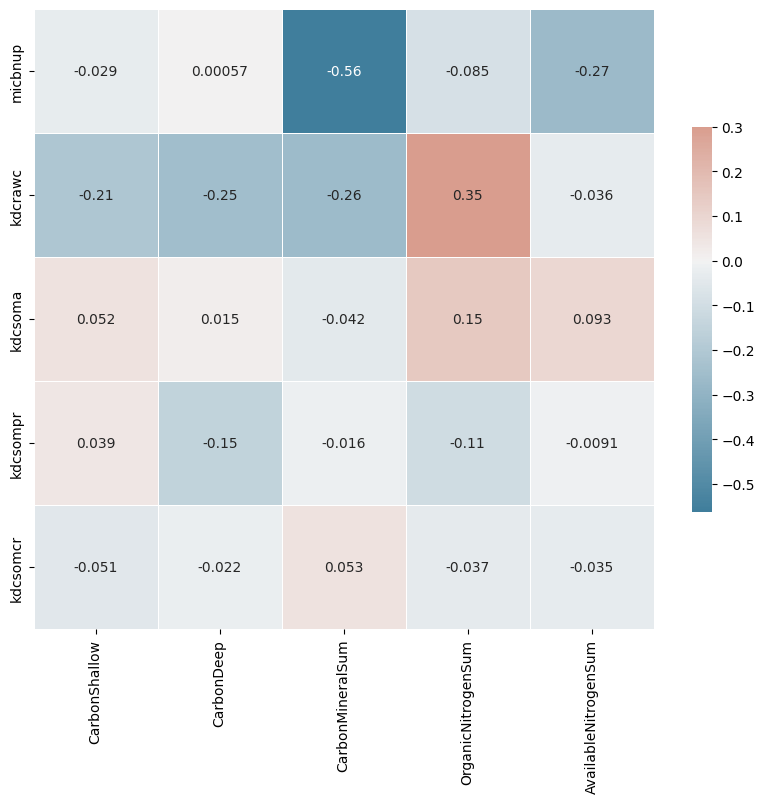

In [28]:
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(10, 10))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, cmap=cmap, vmax=.3, center=0,annot=True,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [29]:
def minMax(x):
    return pd.Series(index=['min','max'],data=[x.min(),x.max()])


minmax=results[calib_params_flat].iloc[top].apply(minMax)

In [30]:
minmax.columns

Index(['micbnup', 'kdcrawc', 'kdcsoma', 'kdcsompr', 'kdcsomcr'], dtype='object')

In [31]:
minmax

,micbnup,kdcrawc,kdcsoma,kdcsompr,kdcsomcr
min,0.022034,0.00013,0.006584,0.001235,3.254020e-09
max,0.898986,0.96335,0.779879,0.244610,9.919636e-08


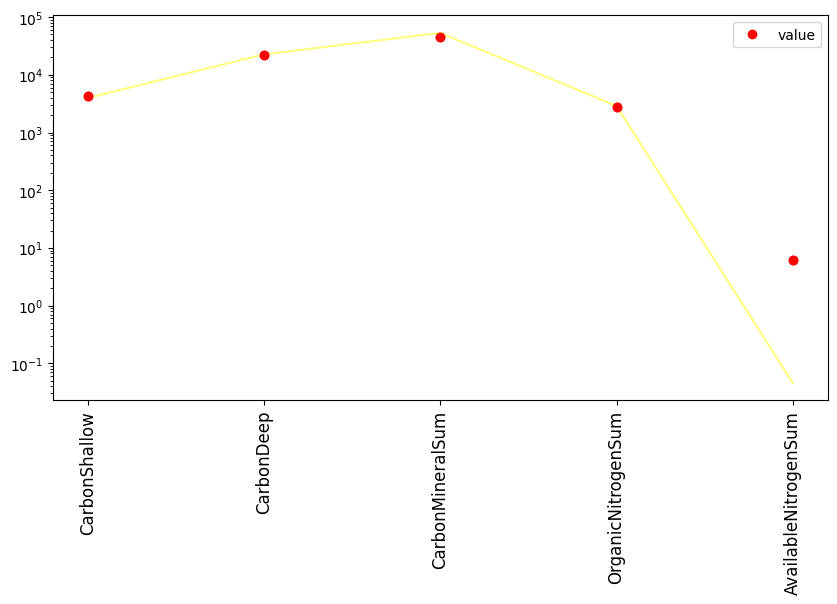

In [32]:



if STEP==4:
    spaghetti_match_plot(target_df, results[target_vars], logy=True)


In [33]:
results.sort_values(by='CarbonDeep', ascending=False).head(20)

,CarbonShallow,CarbonDeep,CarbonMineralSum,OrganicNitrogenSum,AvailableNitrogenSum,micbnup,kdcrawc,kdcsoma,kdcsompr,kdcsomcr,...,OrganicNitrogenSum_rmse_raw,OrganicNitrogenSum_rmse_scaled,OrganicNitrogenSum_accuracy,AvailableNitrogenSum_r2_raw,AvailableNitrogenSum_rmse_raw,AvailableNitrogenSum_rmse_scaled,AvailableNitrogenSum_accuracy,overall_accuracy,mean_rmse,mean_r2
52,8457.712157,58323.050180,45798.054382,3344.311211,1.544477,0.303133,0.007862,0.506583,0.112471,1.343614e-08,...,595.944211,0.772090,NaN,NaN,4.609349,0.108205,NaN,NaN,0.381706,NaN
154,7974.752338,47383.101535,47558.331329,3120.156382,1.062971,0.514012,0.009978,0.580138,0.134378,8.361341e-08,...,371.789382,0.481231,NaN,NaN,5.090855,0.123629,NaN,NaN,0.272536,NaN
495,5156.181827,45027.680702,50095.624725,3156.078589,1.455060,0.898986,0.122303,0.168754,0.001235,3.936113e-09,...,407.711589,0.527843,NaN,NaN,4.698766,0.111070,NaN,NaN,0.273736,NaN
319,10438.317932,41973.013782,46136.702061,2821.163547,0.079503,0.936020,0.013644,0.069871,0.065389,2.794946e-09,...,72.796547,0.093263,NaN,NaN,6.074323,0.155133,NaN,NaN,0.167852,NaN
113,9085.254455,41846.724921,46260.108208,2816.807361,0.277190,0.542130,0.015058,0.772187,0.063472,6.760587e-08,...,68.440361,0.087610,NaN,NaN,5.876636,0.148801,NaN,NaN,0.163512,NaN
451,43720.473460,38556.462823,45977.220638,2840.013605,0.267993,1.733411,0.009911,0.623547,0.115723,9.888417e-08,...,91.646605,0.117722,NaN,NaN,5.885833,0.149095,NaN,NaN,0.195583,NaN
409,10565.878569,34986.617133,47999.044495,2825.724125,0.025001,1.625614,0.013822,0.521256,0.167550,7.986759e-08,...,77.357125,0.099181,NaN,NaN,6.128825,0.156879,NaN,NaN,0.138710,NaN
365,7049.458393,32972.282483,48109.465694,2825.208287,0.002575,1.901560,0.021943,0.786104,0.022447,8.144053e-08,...,76.841287,0.098511,NaN,NaN,6.151251,0.157597,NaN,NaN,0.123289,NaN
410,7770.591582,30138.793448,53344.473476,2824.093853,0.135816,1.866178,0.020034,0.127258,0.221657,4.585727e-08,...,75.726853,0.097065,NaN,NaN,6.018010,0.153329,NaN,NaN,0.130543,NaN
3,7796.437778,30129.454000,50993.732887,2791.576483,0.013630,1.853501,0.019023,0.384091,0.172243,7.227347e-08,...,43.209483,0.054871,NaN,NaN,6.140196,0.157243,NaN,NaN,0.112398,NaN


In [34]:
targets

CarbonShallow            4362.190000
CarbonDeep              22396.020000
CarbonMineralSum        45220.400000
OrganicNitrogenSum       2748.367000
AvailableNitrogenSum        6.153826
Name: 500, dtype: float64

In [35]:
results.iloc[[495,400,63,162, 119, 144]]

,CarbonShallow,CarbonDeep,CarbonMineralSum,OrganicNitrogenSum,AvailableNitrogenSum,micbnup,kdcrawc,kdcsoma,kdcsompr,kdcsomcr,...,OrganicNitrogenSum_rmse_raw,OrganicNitrogenSum_rmse_scaled,OrganicNitrogenSum_accuracy,AvailableNitrogenSum_r2_raw,AvailableNitrogenSum_rmse_raw,AvailableNitrogenSum_rmse_scaled,AvailableNitrogenSum_accuracy,overall_accuracy,mean_rmse,mean_r2
495,5156.181827,45027.680702,50095.624725,3156.078589,1.455060,0.898986,0.122303,0.168754,0.001235,3.936113e-09,...,407.711589,0.527843,NaN,NaN,4.698766,0.111070,NaN,NaN,0.273736,NaN
400,3742.413884,30061.629588,51539.268345,2905.536136,0.076875,1.202606,0.508619,0.234107,0.002610,4.962896e-08,...,157.169136,0.202743,NaN,NaN,6.076951,0.155217,NaN,NaN,0.139905,NaN
63,3952.818760,29619.753605,51591.918810,2940.766267,0.057296,1.545538,0.493957,0.014622,0.003251,3.570936e-08,...,192.399267,0.248457,NaN,NaN,6.096530,0.155844,NaN,NaN,0.146655,NaN
162,3423.099504,29821.677582,51851.259602,2897.793009,0.053925,1.448248,0.650197,0.568469,0.003083,2.177456e-08,...,149.426009,0.192696,NaN,NaN,6.099901,0.155952,NaN,NaN,0.138509,NaN
119,3068.255830,26452.883821,54401.312907,2921.773108,0.047731,1.348196,0.967239,0.086005,0.003072,4.336394e-08,...,173.406108,0.223812,NaN,NaN,6.106095,0.156151,NaN,NaN,0.137727,NaN
144,3592.207584,22639.302909,53256.077083,2834.814945,0.032709,1.034717,0.159833,0.071426,0.005763,1.658316e-08,...,86.447945,0.110977,NaN,NaN,6.121117,0.156632,NaN,NaN,0.088099,NaN


In [36]:
print(results.iloc[[144,63,400,495]]['micbnup'].min())
print(results.iloc[[144,63,400,495]]['micbnup'].max())


0.8989856727182547
1.545537552847429


In [37]:
print(results.iloc[[144,63,400,495]]['kdcrawc'].min())
print(results.iloc[[144,63,400,495]]['kdcrawc'].max())

0.1223030221656705
0.5086194058776302


In [38]:
print(results.iloc[[144,63,400,495]]['kdcsoma'].min())
print(results.iloc[[144,63,400,495]]['kdcsoma'].max())

0.0146219778370054
0.2341066981378259


In [39]:
print(results.iloc[[144,63,400,495]]['kdcsompr'].min())
print(results.iloc[[144,63,400,495]]['kdcsompr'].max())

0.0012349104016401
0.0057631126428844


In [40]:
print(results.iloc[[144,63,400,495]]['kdcsomcr'].min())
print(results.iloc[[144,63,400,495]]['kdcsomcr'].max())

3.936112514349536e-09
4.9628959797862384e-08


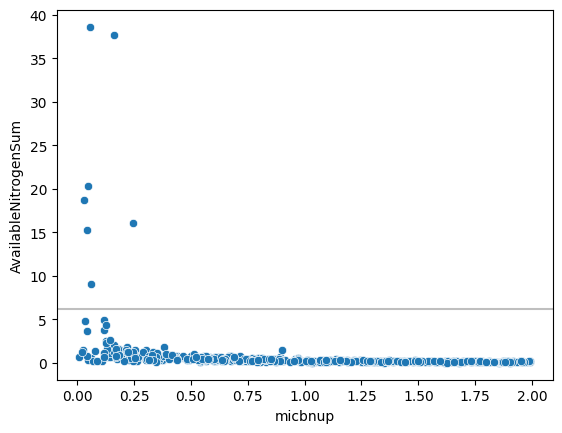

In [41]:
sns.scatterplot(data=results, x='micbnup', y='AvailableNitrogenSum')
plt.axhline(targets['AvailableNitrogenSum'], color='grey', alpha=0.5)

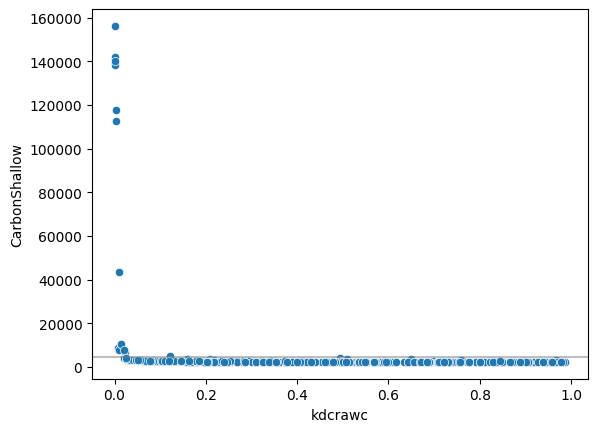

In [42]:
sns.scatterplot(data=results, x='kdcrawc', y='CarbonShallow')
plt.axhline(targets['CarbonShallow'], color='grey', alpha=0.5)

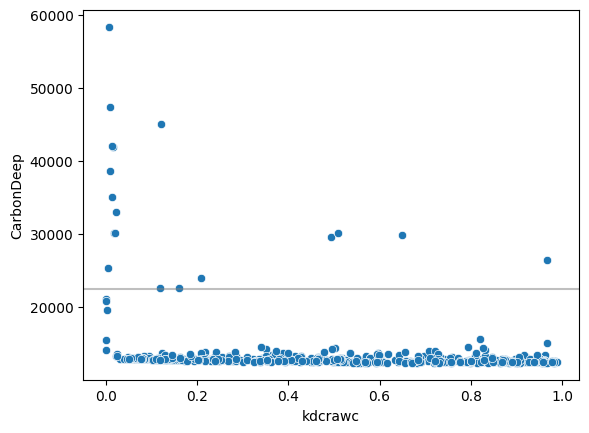

In [43]:
sns.scatterplot(data=results, x='kdcrawc', y='CarbonDeep')
plt.axhline(targets['CarbonDeep'], color='grey', alpha=0.5)

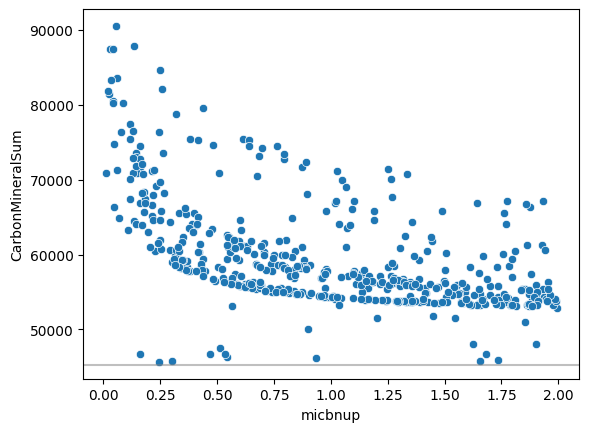

In [44]:
sns.scatterplot(data=results, x='micbnup', y='CarbonMineralSum')
plt.axhline(targets['CarbonMineralSum'], color='grey', alpha=0.5)

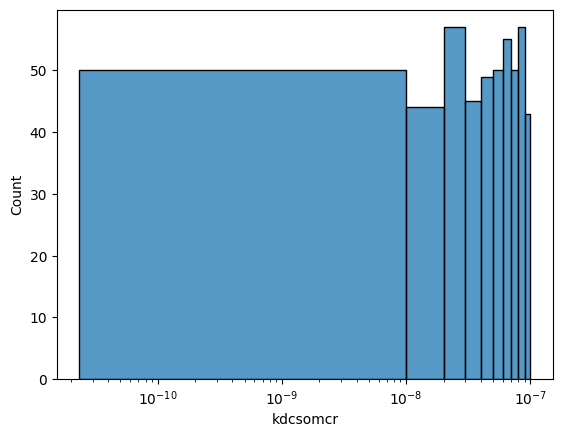

In [45]:
sns.histplot(data=results, x='kdcsomcr')
plt.xscale("log")

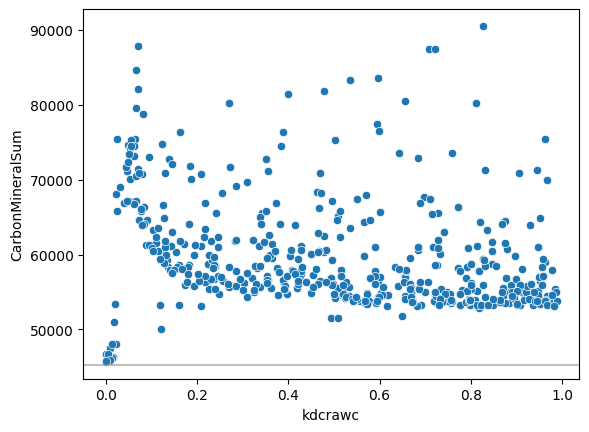

In [46]:
sns.scatterplot(data=results, x='kdcrawc', y='CarbonMineralSum')
plt.axhline(targets['CarbonMineralSum'], color='grey', alpha=0.5)

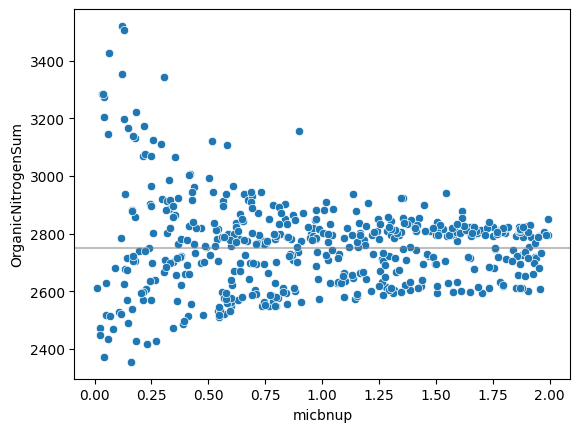

In [47]:
sns.scatterplot(data=results, x='micbnup', y='OrganicNitrogenSum')
plt.axhline(targets['OrganicNitrogenSum'], color='grey', alpha=0.5)

In [48]:
pd.melt(pd.DataFrame(targets))

,variable,value
0,500,4362.190000
1,500,22396.020000
2,500,45220.400000
3,500,2748.367000
4,500,6.153826


In [49]:
pd.DataFrame(targets)

,500
CarbonShallow,4362.190000
CarbonDeep,22396.020000
CarbonMineralSum,45220.400000
OrganicNitrogenSum,2748.367000
AvailableNitrogenSum,6.153826


In [50]:
targets.index

Index(['CarbonShallow', 'CarbonDeep', 'CarbonMineralSum', 'OrganicNitrogenSum',
       'AvailableNitrogenSum'],
      dtype='object')